In [22]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [23]:
data_dir = "D:\MED_LEAF_ID\data\dataset\Medicinal Leaf dataset"

In [24]:
data = []

In [25]:
for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    if os.path.isdir(folder_path):  # Ensure it's a folder
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            data.append({"image_path": image_path, "label": folder_name})


In [26]:
df = pd.DataFrame(data)
print("Dataset Overview:")
print(df.head())
print(f"Total Images: {len(df)}")
print(f"Total Classes: {df['label'].nunique()}")

Dataset Overview:
                                          image_path     label
0  D:\MED_LEAF_ID\data\dataset\Medicinal Leaf dat...  Aloevera
1  D:\MED_LEAF_ID\data\dataset\Medicinal Leaf dat...  Aloevera
2  D:\MED_LEAF_ID\data\dataset\Medicinal Leaf dat...  Aloevera
3  D:\MED_LEAF_ID\data\dataset\Medicinal Leaf dat...  Aloevera
4  D:\MED_LEAF_ID\data\dataset\Medicinal Leaf dat...  Aloevera
Total Images: 12812
Total Classes: 90


In [27]:
print("\nClass Distribution:")
print(df['label'].value_counts())


Class Distribution:
label
Tulasi          323
Curry_Leaf      314
Doddpathre      288
Mint            288
Castor          283
               ... 
Kasambruga       48
Pea              47
Seethaashoka     47
Raddish          40
Turmeric         39
Name: count, Length: 90, dtype: int64


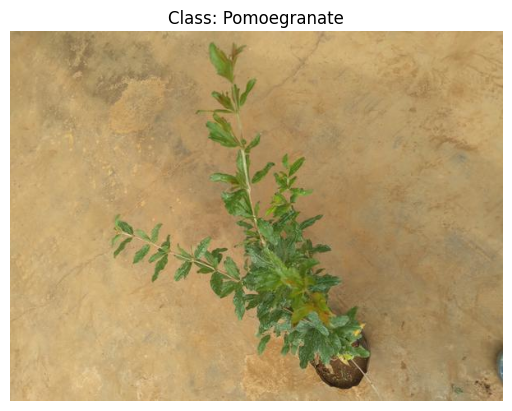

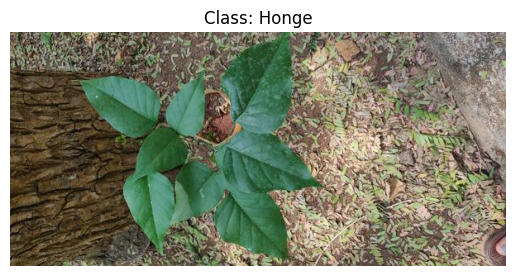

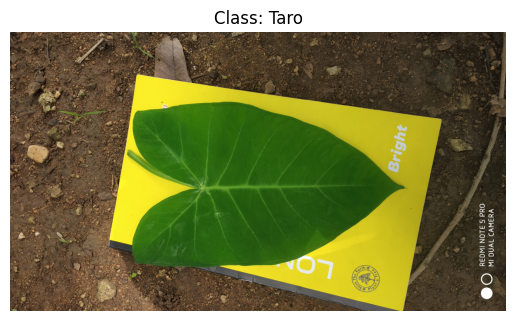

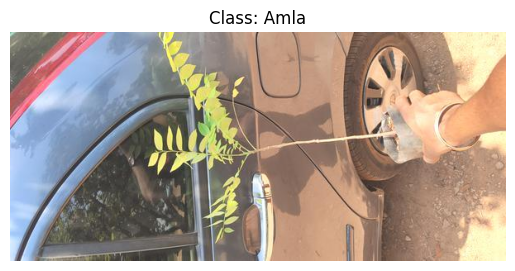

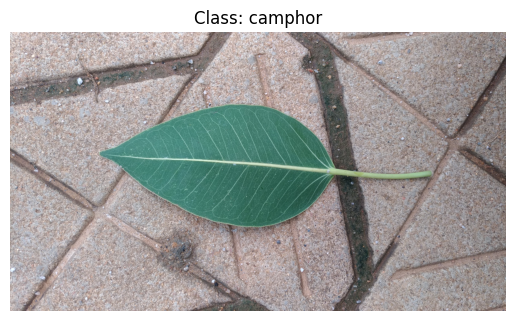

In [28]:
import random

# Display random images
for i in range(5):
    random_row = df.sample(1).iloc[0]
    img = Image.open(random_row['image_path'])
    plt.imshow(img)
    plt.title(f"Class: {random_row['label']}")
    plt.axis("off")
    plt.show()

In [29]:
# Collect image properties
dimensions = []
for img_path in df['image_path']:
    with Image.open(img_path) as img:
        dimensions.append(img.size)

# Analyze properties
dim_df = pd.DataFrame(dimensions, columns=["Width", "Height"])
print("Image Properties Summary:")
print(dim_df.describe())


Image Properties Summary:
              Width        Height
count  12812.000000  12812.000000
mean    1197.961677    943.426397
std     1329.727613   1010.434591
min      277.000000    270.000000
25%      450.000000    450.000000
50%      600.000000    600.000000
75%      600.000000    600.000000
max     4656.000000   4656.000000


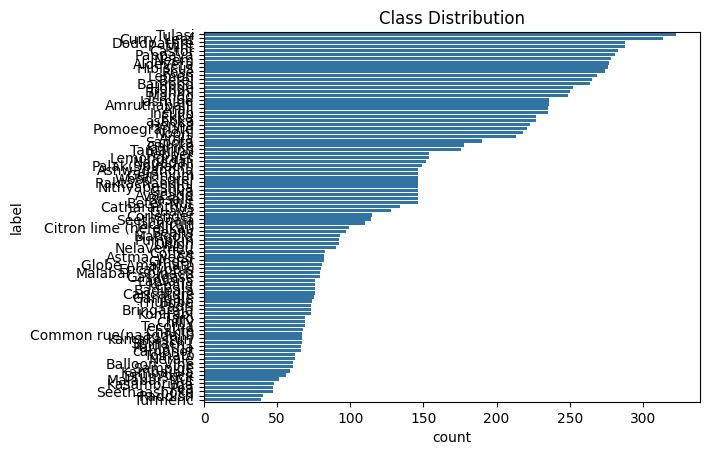

Corrupt images: 0


In [30]:
# Check for class imbalance
import seaborn as sns

sns.countplot(data=df, y="label", order=df['label'].value_counts().index)
plt.title("Class Distribution")
plt.show()

# Check for corrupt images
corrupt_count = 0
for img_path in df['image_path']:
    try:
        with Image.open(img_path) as img:
            img.verify()  # Verify if the image is valid
    except:
        corrupt_count += 1
print(f"Corrupt images: {corrupt_count}")


In [31]:
class_distribution = df['label'].value_counts()

# Convert the distribution to string for better formatting
class_distribution_str = class_distribution.to_string()

# Print the entire distribution
print(class_distribution_str)



label
Tulasi                     323
Curry_Leaf                 314
Doddpathre                 288
Mint                       288
Castor                     283
Pappaya                    281
Neem                       278
Aloevera                   277
Hibiscus                   276
Rose                       274
Lemon                      269
Betel                      265
Bamboo                     264
Honge                      252
Brahmi                     250
Mango                      249
Jasmine                    236
Amruthaballi               236
Arali                      235
Insulin                    235
Ekka                       227
ashoka                     227
Henna                      223
Pomoegranate               221
Nooni                      218
Amla                       213
Sapota                     190
Ganike                     178
Tamarind                   176
Pepper                     154
Lemongrass                 154
Nagadali                   152
Pa